In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
df = pd.read_csv(url)

df.to_csv("tips.csv", index=False)

print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [7]:
import pandas as pd
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.to_csv("iris.csv", index=False)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Dataset Shape: (244, 7)

First 5 Rows:
    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None

Numeric Summary:
        total_bill         tip        size
count  244.000000  24

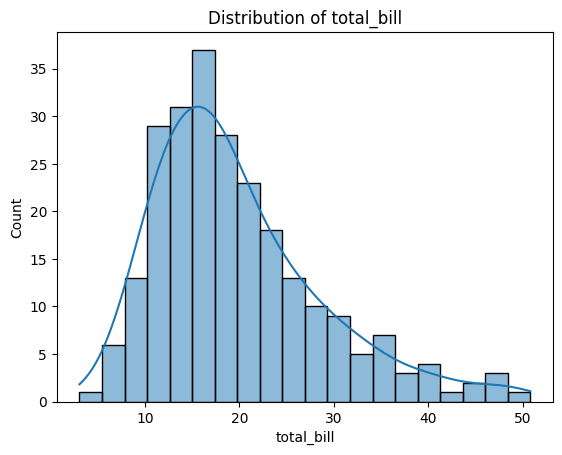

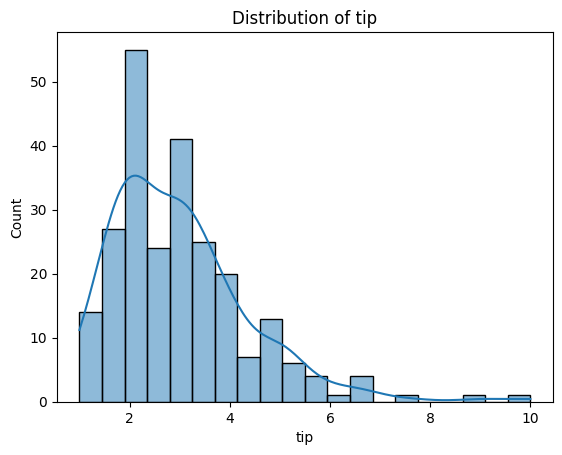

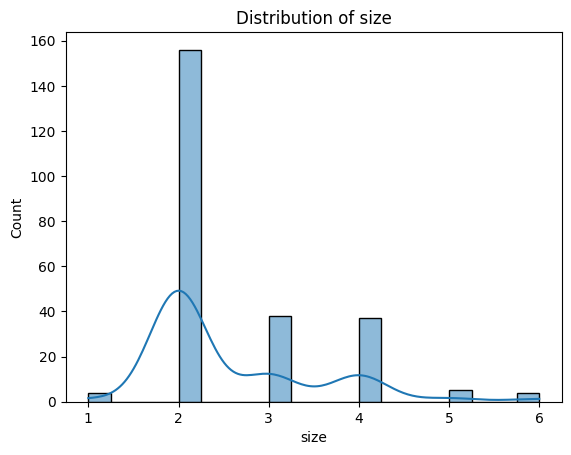

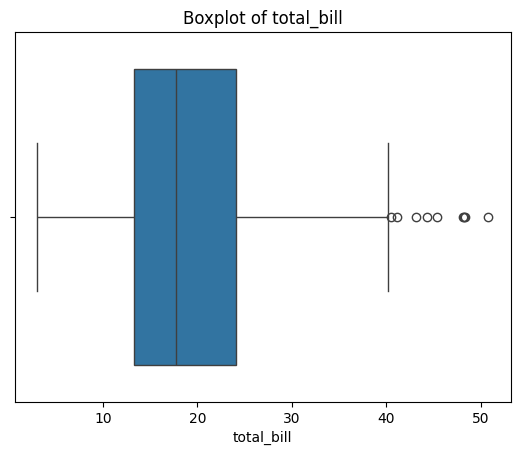

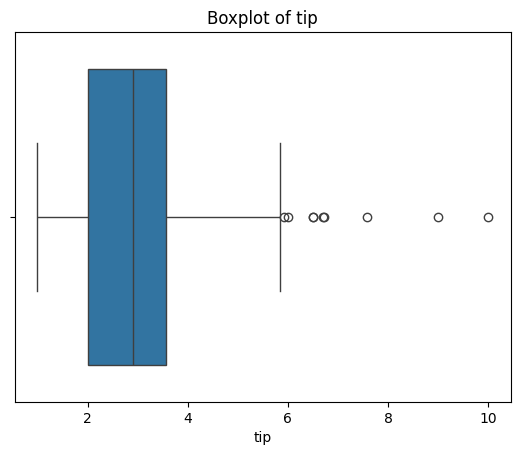

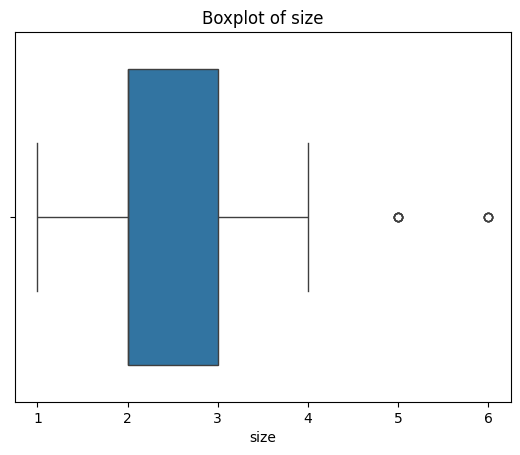

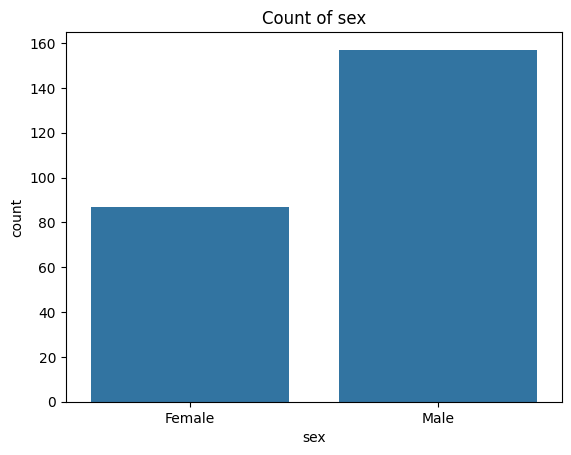

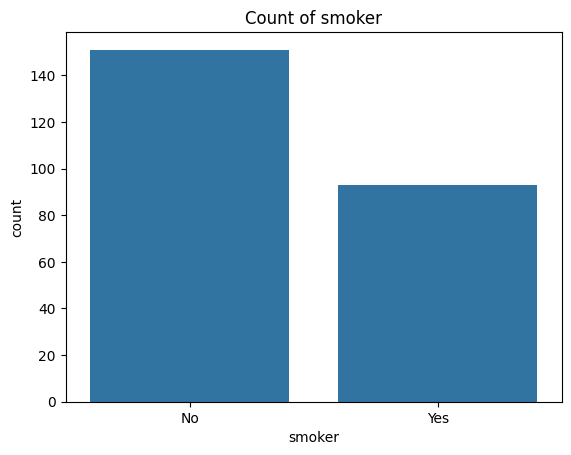

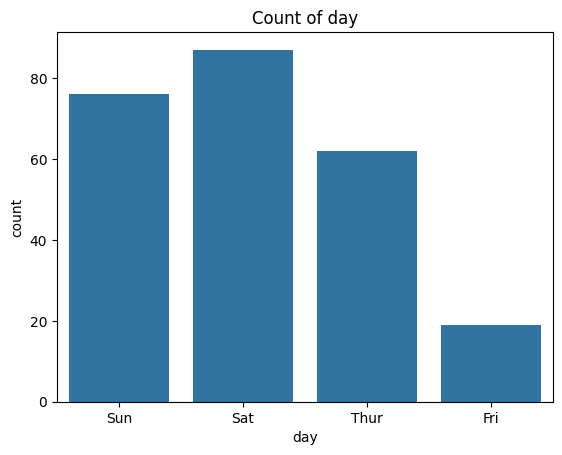

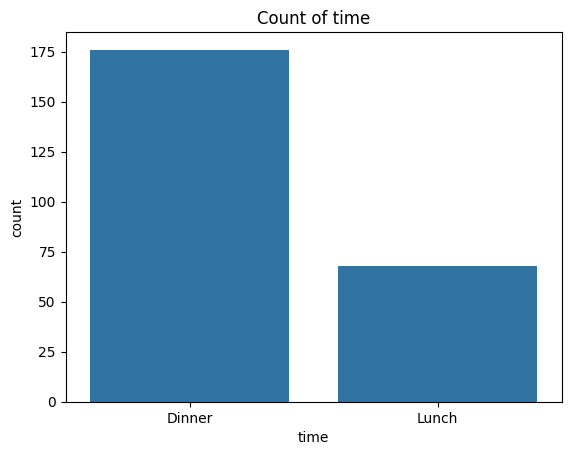

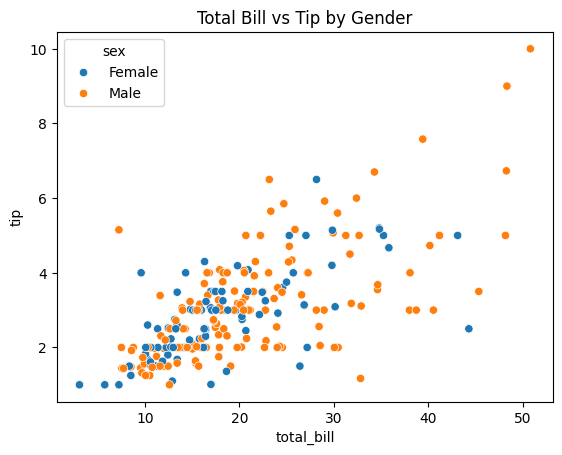

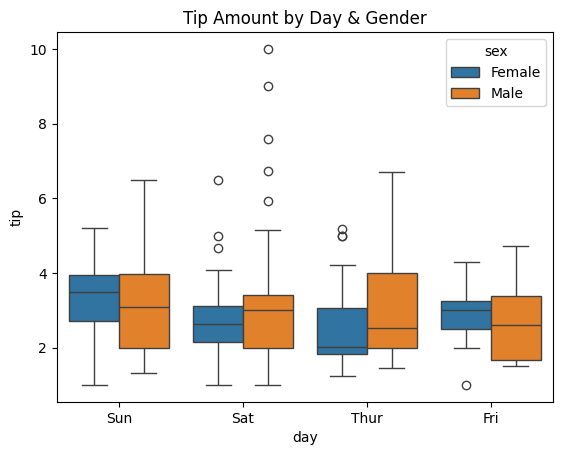

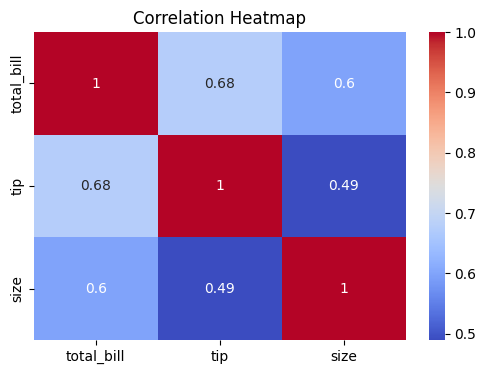


Average Tip by Gender:
 sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

Average Tip by Smoker/Non-Smoker:
 smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64


'\nObservations:\n- total_bill and tip are positively correlated (~0.68).\n- Most tips are between 2 and 4 dollars.\n- Friday has the fewest records; Saturday & Sunday are busiest.\n- Male customers tip slightly more on average than female customers.\n- No missing values or duplicates in this dataset.\n\nPotential Data Issues:\n- Small sample size for Friday could bias results.\n- Outliers present in total_bill (very high bills).\n'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
df = pd.read_csv(url)

"""
Questions to answer:
1. What are the data types and structure of this dataset?
2. Are there any missing values or duplicates?
3. How are numeric features distributed? Any outliers?
4. What is the relationship between total_bill, tip, and size?
5. Do male or female customers tip more on average?
6. Does smoking status affect tip amount?
"""

print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())
print("\nData Info:\n")
print(df.info())
print("\nNumeric Summary:\n", df.describe())
print("\nCategorical Summary:\n", df.describe(include=['object']))

print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

numeric_cols = ['total_bill', 'tip', 'size']
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

for col in ['sex', 'smoker', 'day', 'time']:
    plt.figure()
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.show()

plt.figure()
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=df)
plt.title("Total Bill vs Tip by Gender")
plt.show()

plt.figure()
sns.boxplot(x='day', y='tip', hue='sex', data=df)
plt.title("Tip Amount by Day & Gender")
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

print("\nAverage Tip by Gender:\n", df.groupby('sex')['tip'].mean())

print("\nAverage Tip by Smoker/Non-Smoker:\n", df.groupby('smoker')['tip'].mean())

"""
Observations:
- total_bill and tip are positively correlated (~0.68).
- Most tips are between 2 and 4 dollars.
- Friday has the fewest records; Saturday & Sunday are busiest.
- Male customers tip slightly more on average than female customers.
- No missing values or duplicates in this dataset.

Potential Data Issues:
- Small sample size for Friday could bias results.
- Outliers present in total_bill (very high bills).
"""
